**Kuramoto model - Paper 2008**

In [1]:
import numpy as np
from sympy import *
from numpy.linalg import eig
import matplotlib.pyplot as plt
import csv

In [2]:
# Synchronization order parameter 
def sync_order_parameter(N, theta): #(at a given time t)
    r_var = 0
    for i in range(len(theta)):
        r_var+=np.exp(1j*theta[i])
    r_var = (1./float(N))*r_var
    return r_var 

In [3]:
N = 3
omega = 1.
gamma = omega*(N-1)/N

M = np.array([[-gamma, omega/N, omega/N],
            [omega/N, -gamma, omega/N],
            [omega/N, omega/N, -gamma]])

eigenvalues,eigenvectors=eig(M)
print("eigenvalues",eigenvalues)
print("eigenvectors",eigenvectors)

v = np.array(eigenvectors)
for i in range(N):
    v[i]=v[i]/np.absolute(v[i])

lambdas = np.array(eigenvalues)
lambdas.sort()
theta0 = np.array([1.0,-0.2,0.5])*np.pi
psi0 = np.cos(theta0)+1j*np.sin(theta0)

print("lambdas",lambdas)
print("v",v)
print("Psi0",psi0)
    
# Resolver ecuaciones lineales
from scipy import linalg

# Ax = b
# v1_x * a1 + v2_x * a2 + v3_x * xa3 = psi1
# v1_y * a1 + v2_y * a2 + v3_z * xa3 = psi2
# v1_z * a1 + v2_y * a2 + v3_z * xa3 = psi3
A = np.array ([[v[0][0], v[1][0], v[2][0]], 
               [v[0][1], v[1][1], v[2][1]], 
               [v[0][2], v[1][2], v[2][2]]]) # A representa la matriz de coeficientes
b = np.array ([psi0[0], psi0[1], psi0[2]]) # b representa una columna constante
print("A",A)
print("b",b)
a = linalg.solve(A, b)
print("a",a)

eigenvalues [-1.00000000e+00 -5.68558955e-17 -1.00000000e+00]
eigenvectors [[-0.81649658  0.57735027  0.02445779]
 [ 0.40824829  0.57735027 -0.71901837]
 [ 0.40824829  0.57735027  0.69456058]]
lambdas [-1.00000000e+00 -1.00000000e+00 -5.68558955e-17]
v [[-1.  1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Psi0 [-1.00000000e+00+1.22464680e-16j  8.09016994e-01-5.87785252e-01j
  6.12323400e-17+1.00000000e+00j]
A [[-1.  1.  1.]
 [ 1.  1.  1.]
 [ 1. -1.  1.]]
b [-1.00000000e+00+1.22464680e-16j  8.09016994e-01-5.87785252e-01j
  6.12323400e-17+1.00000000e+00j]
a [ 0.9045085-0.29389263j  0.4045085-0.79389263j -0.5      +0.5j       ]


In [4]:
file = open("results_linear_reform.txt", "w")
writer = csv.writer(file, delimiter=' ')

#------
theta = np.zeros(N)
psi = np.zeros(N,dtype=complex)
#-----

t0 = 0.
dt = 0.0001
steps = 100000
for n in range(steps): 
    t = t0 + n*dt # time
    psi=0.0+0.0j
    for j in range(N):
        psi += a[j]*v[j]*np.exp(lambdas[j]*t)
        
    for i in range(len(theta)):
         theta[i]=np.angle(psi[i])

   # Another option
   #     if (np.imag(psi[i]) > 0):
   #         if (np.real(psi[i]) > 0):
   #             theta[i]=np.arctan(np.imag(psi[i])/np.real(psi)[i])
   #         else:
   #             theta[i]=np.arctan(np.imag(psi[i])/np.real(psi[i]))+np.pi

   #     else:
   #         if (np.real(psi[i]) > 0):
   #             theta[i]=np.arctan(np.imag(psi[i])/np.real(psi[i]))
   #         else:
   #             theta[i]=np.arctan(np.imag(psi[i])/np.real(psi[i]))-np.pi
    
       
    for i in range(len(theta)):
        # We limit the solution between -pi and pi   
        if np.pi < theta[i] < 2*np.pi:
            theta[i] = theta[i] - 2*np.pi
        if -np.pi < theta[i] < -2*np.pi:
            theta[i] = theta[i] + 2*np.pi         
    r = abs(sync_order_parameter(N, theta)) # modulus of the sync order parameter
    writer.writerow(("{:.4f}".format(t), 
                    "{:.6f}".format(psi[0]), "{:.6f}".format(psi[1]), "{:.6f}".format(psi[2]),
                    "{:.6f}".format(theta[0]), "{:.6f}".format(theta[1]), "{:.6f}".format(theta[2]), 
                    "{:.12f}".format(r)))
file.close()        

**DATA PROCESSING**

In [5]:
N = 3 # number of oscillators
steps = 100000

time = np.zeros(steps)
psi= np.zeros((steps,N))
theta = np.zeros((steps,N))
order_p = np.zeros(steps)

lines = 0 # counter
with open("results_linear_reform.txt","r") as file1:
    for line in file1:
        line = line.split(' ')
        time[lines] = float(line[0])
        #psi[lines]=complex(line[1:4:])
        theta[lines]=line[4:7:]
        order_p[lines]=line[7]
        lines+=1 

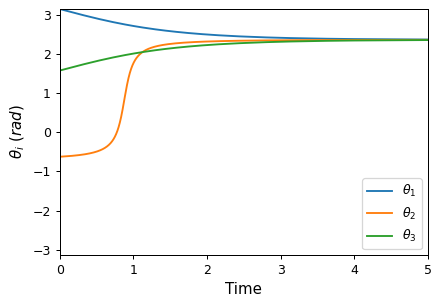

In [6]:
plt.figure(figsize=(5,3.5), dpi=90)

plt.ylabel(r'$\theta_{i} \ (rad)$', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.plot(time,theta[:,0], label=r'$\theta_{1}$')  
plt.plot(time,theta[:,1], label=r'$\theta_{2}$') 
plt.plot(time,theta[:,2], label=r'$\theta_{3}$') 
plt.legend(loc='lower right')
plt.ylim((-np.pi,np.pi))
plt.xlim((0,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('linear_reform.png')
plt.show()